# Reto Técnico DS

## 1. Precios
**Objetivo:** factores que influyen en el precio por metro cuadrado de la vivienda.

### Investigación Previa
Dado que sabemos nuestro objetivo con claridad, podemos investigar los componentes clave para determinar el precio por metro cuadrado, esto nos servirá para saber en qué enfocarnos a la hora de manejar la base de datos.

Según el Instituto de Valuación existen 12 elementos básicos que determinan el precio por m², los cuales son:
1. Uso o tipo de diseño.
2. Tipo o clase de construcción.
3. Calidad de la construcción.
4. Tamaño del edificio.
5. Forma del edificio.
6. Distribución.
7. Claro de las ventanas y puertas.
8. Altura de techos y de paredes.
9. Construcción súper adecuada.
10. Número de pisos o de niveles.
11. Instalaciones especiales.
12. Otras diversas partidas que afectan al costo.

Primero tenemos que realizar un análisis exploratorio de los datos para familiarizarnos con ellos manteniendo en mente los 12 puntos que acabamos de ver. <br>
**Nota:** Hay valores que ya se encuentran en los datos originales, pero de igual forma los calcularé yo para mostrar el manejo de bases de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('reto_precios.csv')

In [3]:
# Visualizamos las primeras 5 entradas para conocer los datos.
df.head()

,main_name,subtitle,link,location,price,attributes,timestamp,id,address,since,...,apartments_per_floor,disposition,parking_lots,floor_situated,orientation,num_bedrooms,department_type,m2,final_price,price_square_meter
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...",9000000 pesos,"127 m² construidos,2 recs.",2022-03-29,1,"Sinaloa 20 , Roma Sur",Publicado hace 5 días,...,NaN,Contrafrente,2,NaN,NaN,2.0,NaN,127.0,9000000.0,70866.141732
1,Preventa Exclusiva · Terraloza Roma Norte ·,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tonala, Roma Norte, Cuauhtémoc, Distrito Federal",4264000 pesos,"54 m² construidos,1 rec.",2022-03-29,2,Tonala,Publicado hace 7 días,...,NaN,NaN,1,NaN,NaN,1.0,NaN,54.0,4264000.0,78962.962963
2,Townhouse Único En La Roma Sur,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",8093500 pesos,"163 m² construidos,3 recs.",2022-03-29,3,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",Publicado hace 4 días,...,NaN,NaN,2,NaN,NaN,3.0,NaN,163.0,8093500.0,49653.374233
3,"Departamento En Roma Sur, Cuauhtémoc Con 2 Rec...",Departamento en venta,https://departamento.metroscubicos.com/MLM-132...,"Linares, Roma Sur, Cuauhtémoc, Distrito Federal",4000000 pesos,"93 m² construidos,2 recs.",2022-03-29,4,Linares,Publicado hace 5 meses por {action},...,NaN,NaN,1,NaN,Oeste,2.0,Loft,93.0,4000000.0,43010.752688
4,Últimos Deptos En Preventa En Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-137...,"Frontera, Roma Norte, Cuauhtémoc, Distrito Fed...",6732700 pesos,"103 m² construidos,2 recs.",2022-03-29,5,Frontera,Publicado hace 52 días,...,NaN,NaN,1,NaN,NaN,2.0,NaN,103.0,6732700.0,65366.019417


In [4]:
# Visualizamos las últimas 5 entradas para corroborar congruencia en los datos.
df.tail()

,main_name,subtitle,link,location,price,attributes,timestamp,id,address,since,...,apartments_per_floor,disposition,parking_lots,floor_situated,orientation,num_bedrooms,department_type,m2,final_price,price_square_meter
976,Monterrey 101,Departamento en venta,https://departamento.metroscubicos.com/MLM-138...,"Monterrey, Roma Sur, Cuauhtémoc, Distrito Federal",6385000 pesos,"140 m² construidos,2 recs.",2022-03-29,981,Monterrey,Publicado hace 40 días,...,NaN,NaN,2,NaN,NaN,2.0,NaN,140.0,6385000.0,45607.142857
977,Monterrey 302,Departamento en venta,https://departamento.metroscubicos.com/MLM-138...,"Monterrey, Roma Sur, Cuauhtémoc, Distrito Federal",4116000 pesos,"84 m² construidos,2 recs.",2022-03-29,982,Monterrey,Publicado hace 40 días,...,NaN,NaN,1,NaN,NaN,2.0,NaN,84.0,4116000.0,49000.000000
978,Monterrey 201,Departamento en venta,https://departamento.metroscubicos.com/MLM-138...,"Monterrey, Roma Sur, Cuauhtémoc, Distrito Federal",4236000 pesos,"88 m² construidos,2 recs.",2022-03-29,983,Monterrey,Publicado hace 40 días,...,NaN,NaN,1,NaN,NaN,2.0,NaN,88.0,4236000.0,48136.363636
979,Departamento En Venta La Roma,Departamento en venta,https://departamento.metroscubicos.com/MLM-136...,"Querétaro, Roma Norte, Cuauhtémoc, Distrito Fe...",6620120 pesos,"114 m² construidos,2 recs.",2022-03-29,984,Querétaro,Publicado hace 2 meses,...,NaN,NaN,2,NaN,NaN,2.0,NaN,114.0,6620120.0,58071.228070
980,Bajio 315 Hanover 506 (casa Roma),Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Bajío 315, Roma Sur, Cuauhtémoc, Distrito Federal",6270000 pesos,"114 m² construidos,3 recs.",2022-03-29,985,Bajío 315,Publicado hace 11 meses,...,NaN,Interno,2,NaN,NaN,3.0,NaN,114.0,6270000.0,55000.000000


De una primera impresión podemos ver que las columnas "apartment_per_floor", "disposition", "floor_situated", "orientation" y "department_type" tienen en su mayoría entradas NaN, es decir, estan vacías, por lo que habrá que ver si hay datos rescatables o se pueden eliminar las columnas mencionadas.

In [5]:
df['apartments_per_floor'].value_counts()

3.0    4
2.0    3
4.0    3
1.0    3
7.0    1
5.0    1
Name: apartments_per_floor, dtype: int64

In [6]:
df['disposition'].value_counts()

Frente          12
Interno          5
Contrafrente     3
Name: disposition, dtype: int64

In [7]:
df['floor_situated'].value_counts()

1.0    14
2.0     4
3.0     2
4.0     2
5.0     2
Name: floor_situated, dtype: int64

In [8]:
df['orientation'].value_counts()

Poniente    3
Sur         2
Oeste       1
Norte       1
Oriente     1
Name: orientation, dtype: int64

In [9]:
df['department_type'].value_counts()

Loft    39
Name: department_type, dtype: int64

Podemos ver que ninguna de las columnas está completamente vacía pero a su vez tienen a lo más 24 entradas, lo que representa el 2.44%, por lo que podemos eliminar dichas columnas.

In [10]:
# Eliminamos columnas y revisamos los datos con los que nos quedamos.
df = df.drop(['apartments_per_floor', 'disposition', 'floor_situated', 'orientation', 'department_type'], axis=1)
df.head()

,main_name,subtitle,link,location,price,attributes,timestamp,id,address,since,...,age_in_years,bathrooms,cellars,num_floors,monthly_fee,parking_lots,num_bedrooms,m2,final_price,price_square_meter
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...",9000000 pesos,"127 m² construidos,2 recs.",2022-03-29,1,"Sinaloa 20 , Roma Sur",Publicado hace 5 días,...,0.0,2.0,NaN,1.0,0 MXN,2,2.0,127.0,9000000.0,70866.141732
1,Preventa Exclusiva · Terraloza Roma Norte ·,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tonala, Roma Norte, Cuauhtémoc, Distrito Federal",4264000 pesos,"54 m² construidos,1 rec.",2022-03-29,2,Tonala,Publicado hace 7 días,...,0.0,1.0,NaN,NaN,NaN,1,1.0,54.0,4264000.0,78962.962963
2,Townhouse Único En La Roma Sur,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",8093500 pesos,"163 m² construidos,3 recs.",2022-03-29,3,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",Publicado hace 4 días,...,0.0,3.0,2.0,3.0,NaN,2,3.0,163.0,8093500.0,49653.374233
3,"Departamento En Roma Sur, Cuauhtémoc Con 2 Rec...",Departamento en venta,https://departamento.metroscubicos.com/MLM-132...,"Linares, Roma Sur, Cuauhtémoc, Distrito Federal",4000000 pesos,"93 m² construidos,2 recs.",2022-03-29,4,Linares,Publicado hace 5 meses por {action},...,0.0,2.0,NaN,NaN,853 MXN,1,2.0,93.0,4000000.0,43010.752688
4,Últimos Deptos En Preventa En Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-137...,"Frontera, Roma Norte, Cuauhtémoc, Distrito Fed...",6732700 pesos,"103 m² construidos,2 recs.",2022-03-29,5,Frontera,Publicado hace 52 días,...,0.0,2.0,NaN,NaN,NaN,1,2.0,103.0,6732700.0,65366.019417


Para trabajar con datos correctos, también hay que verificar no tener renglones duplicados.

In [11]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)


number of duplicate rows:  (0, 30)


Una vez verificamos que no tenemos datos duplicados, podemos empezar a hacer una descripción superficial.

In [12]:
# Realizamos la descripción rápida de los datos que manejaremos.
df.describe()

,id,lat,lon,price_mod,since_value,days_on_site,amenities,age_in_years,bathrooms,cellars,num_floors,parking_lots,num_bedrooms,m2,final_price,price_square_meter
count,981.000000,981.000000,981.000000,9.810000e+02,981.000000,981.000000,504.000000,981.0,981.000000,52.000000,84.000000,981.000000,981.000000,981.000000,9.810000e+02,981.000000
mean,494.465851,19.654796,-99.222834,6.144620e+06,15.589195,103.478084,4.081349,0.0,1.970438,1.019231,3.607143,1.331295,2.103976,111.824608,6.144620e+06,61048.999248
std,284.137165,1.244009,0.608650,2.907089e+06,16.551510,116.789698,1.264019,0.0,0.887638,0.138675,2.789904,0.481631,0.627104,231.604294,2.907089e+06,19327.439701
min,1.000000,19.360533,-117.063962,6.342170e+05,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,6.342170e+05,582.246879
25%,250.000000,19.405824,-99.165172,4.330000e+06,3.000000,31.000000,4.000000,0.0,2.000000,1.000000,1.000000,1.000000,2.000000,75.000000,4.330000e+06,52294.117647
50%,495.000000,19.411515,-99.163637,5.511689e+06,7.000000,59.000000,4.000000,0.0,2.000000,1.000000,3.000000,1.000000,2.000000,93.000000,5.511689e+06,61271.466667
75%,740.000000,19.419526,-99.161332,7.700000e+06,31.000000,120.000000,5.000000,0.0,2.000000,1.000000,5.000000,2.000000,2.000000,129.000000,7.700000e+06,70175.438596
max,985.000000,32.528726,-99.128642,2.233000e+07,59.000000,730.000000,8.000000,0.0,23.000000,2.000000,12.000000,3.000000,4.000000,7210.000000,2.233000e+07,150514.818182


In [13]:
# Verificamos el tipo de datos que tenemos en cada columna.
df.dtypes

main_name              object
subtitle               object
link                   object
location               object
price                  object
attributes             object
timestamp              object
id                      int64
address                object
since                  object
description            object
vendor                 object
lat                   float64
lon                   float64
price_mod             float64
price_currency         object
since_period           object
since_value             int64
days_on_site          float64
amenities             float64
age_in_years          float64
bathrooms             float64
cellars               float64
num_floors            float64
monthly_fee            object
parking_lots            int64
num_bedrooms          float64
m2                    float64
final_price           float64
price_square_meter    float64
dtype: object

Ahora notamos que hay muchos datos que hay que procesar para poder sacar información de ellos, como sacar el precio en numeros o la colonia, para ello primero identifiquemos los valores que pueden ser de nuestro interés.

A continuación podremos ver el primer punto importante de valuación, uso o diseñ, donde la totalidad son departamentos, es decir, nuestros datos son de inmuebles de vivienda.

In [14]:
df['subtitle'].value_counts()
# Todos nuestros inmuebles son departamentos en venta, por lo que no es un dato relevante.

Departamento en venta    981
Name: subtitle, dtype: int64

### Ubicación

Nuestro siguiente dato relevante será la ubicación. Para obtener dicha información, tenemos las columnas 'location' y 'adress'. Veamos cuáles son sus características y diferencias.

In [15]:
df['location']

0      Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...
1       Tonala, Roma Norte, Cuauhtémoc, Distrito Federal
2      Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...
3        Linares, Roma Sur, Cuauhtémoc, Distrito Federal
4      Frontera, Roma Norte, Cuauhtémoc, Distrito Fed...
                             ...                        
976    Monterrey, Roma Sur, Cuauhtémoc, Distrito Federal
977    Monterrey, Roma Sur, Cuauhtémoc, Distrito Federal
978    Monterrey, Roma Sur, Cuauhtémoc, Distrito Federal
979    Querétaro, Roma Norte, Cuauhtémoc, Distrito Fe...
980    Bajío 315, Roma Sur, Cuauhtémoc, Distrito Federal
Name: location, Length: 981, dtype: object

In [16]:
df['location'][0]

'Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, Distrito Federal'

Podemos identificar que tenemos en datos separados por comas la siguiente información: 
- Calle (y número cuando está disponible)
- Colonia 
- Delegación
- Ciudad

Sin embargo hay que tener cuidado, pues por ejemplo, usando la numeración de Python, la entrada 0 tiene 2 veces la colonia haciendo que tenga 5 rasgos, mientras la entrada 1 únicamente tiene 4, pues no repite la colonia.

In [17]:
df['address']

0                                  Sinaloa 20 , Roma Sur
1                                                 Tonala
2      Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...
3                                                Linares
4                                               Frontera
                             ...                        
976                                            Monterrey
977                                            Monterrey
978                                            Monterrey
979                                            Querétaro
980                                            Bajío 315
Name: address, Length: 981, dtype: object

In [18]:
df['address'][976]

'Monterrey'

Por otra parte vemos un ejemplo donde en la columna 'address' no hay información mas que de la ciudad, por ende para la ubicación usaremos únicamente la información en 'location' (con los cuidados pertintentes).

Sabemos que la información más completa está en 'location', pero no sabemos si es consistente, revisemos.

In [19]:
"""A continuación desglozaré lo que hará el código del ciclo en la siguiente celda.
 
   Sabemos que al poner df['location'] obtenemos todos los valores de la columna 'location' y al iterar sobre
   dicha columna, obtenemos los valores particulares del inmueble i.
   Al usar split, segmentamos los valores en una lista donde delimitamos los valores cada que se encuentre una coma"""

print(df['location'][0].split(','))

""" Y al estar trabajando con una lista accedemos al valor que nos interese de manera habitual"""
print("La calle del primer inmueble es: " + df['location'][0].split(',')[0])

['Sinaloa 20 ', ' Roma Sur', ' Roma Sur', ' Cuauhtémoc', ' Distrito Federal']
La calle del primer inmueble es: Sinaloa 20 


In [20]:
# Pareciera que el primer valor fuese siempre la calle, vamos a verificarlo

# Creamos una lista vacía
calle = []

# Creamos un loop para extraer el primer valor de cada entrada.
for i in df['location']:
    calle.append(i.split(',')[0])
    


In [21]:
calle

['Sinaloa 20 ',
 'Tonala',
 'Tepeji 43',
 'Linares',
 'Frontera',
 'Chilpancingo',
 'Sinaloa 20 ',
 'Roma Sur',
 'Colima',
 'Cuauhtemoc',
 'Roma Sur',
 'Roma Sur',
 'Roma Sur',
 'Roma Sur',
 'Roma Sur',
 'Roma Sur',
 'Roma Sur',
 'Aguascalientes',
 'Roma Sur',
 'Roma Sur',
 'Roma Norte',
 'Roma Sur',
 'Roma Sur',
 'Roma Sur',
 'Viaducto Miguel Alemán',
 'Roma Sur',
 'Querétaro',
 'Aguascalientes',
 'Aguascalientes',
 'Roma Sur',
 'Roma Sur',
 'Roma Norte',
 'Roma Norte',
 'Roma Norte',
 'Av Chapultepec',
 'Roma Sur',
 'Roma Sur',
 'Roma Sur',
 'Roma Norte',
 'Roma Norte',
 'Roma Norte',
 'Querétaro',
 'Roma Sur',
 'Coahuila',
 'Roma Sur',
 'Cuauhtémoc',
 'Roma Norte',
 'Roma Norte',
 'Roma Norte',
 'Roma Norte',
 'Roma Norte',
 'Roma Norte',
 'Roma Norte',
 'Alejandría 111',
 'Roma Sur',
 'Quintana Roo',
 'Roma Norte',
 'Roma Norte',
 'Roma Sur',
 'Roma Norte',
 'Roma Sur',
 'Roma Norte',
 'Roma Sur',
 'Roma Norte',
 'Roma Sur',
 'Roma Sur',
 'Roma Sur',
 'Roma Norte',
 'Roma Norte',
 

Notamos que no, en la primera entrada no siempre está la calle, pues encontramos colonias como lo son 'Roma Norte', delegaciones como 'Cuauhtémoc' e incluso estado s como 'Chiapas'.
Por el momento dejo de lado esta parte del análisis, pues no se me ocurre cómo extraer correctamente la dirección completa en el orden buscado.

### Precio

In [22]:
# Usaremos el mismo método que en ubicación para extraer los precios de la columna'price'.
df['price']

0      9000000 pesos
1      4264000 pesos
2      8093500 pesos
3      4000000 pesos
4      6732700 pesos
           ...      
976    6385000 pesos
977    4116000 pesos
978    4236000 pesos
979    6620120 pesos
980    6270000 pesos
Name: price, Length: 981, dtype: object

Aquí necesitamos separar, por un lado el valor numérico y por otro el tipo de modenda.

In [23]:
# Valor numérico.
precios = []
for i in df['price']:
    # Aprovecharemos para convertir el string en numero, por lo que separamos el precio en p y usamos la función int.
    p = i.split(' ')[0]
    precios.append(int(p))

In [24]:
precios

[9000000,
 4264000,
 8093500,
 4000000,
 6732700,
 3200000,
 9000000,
 5550000,
 10592361,
 5300000,
 10200000,
 11050000,
 9880000,
 7010000,
 6790000,
 9670000,
 7332973,
 9859115,
 3382500,
 4515000,
 4496000,
 5257500,
 4102500,
 3195000,
 4061500,
 3306533,
 5399999,
 4314445,
 4996100,
 4850000,
 3615970,
 3395000,
 4495000,
 5292000,
 2792170,
 3034124,
 9500000,
 8700000,
 4495000,
 12900000,
 3995000,
 8500000,
 6195000,
 6042960,
 5550000,
 5350000,
 4495000,
 4495000,
 4495000,
 12900000,
 3595000,
 3395000,
 3780000,
 2325668,
 5550000,
 4500000,
 5393000,
 2595000,
 2862381,
 4495000,
 7040000,
 4455000,
 7040000,
 9935982,
 3615979,
 3615970,
 4186666,
 2980000,
 2980000,
 2980000,
 4250000,
 3595000,
 2980000,
 3395000,
 7962400,
 4495000,
 3950000,
 4430000,
 4913500,
 2980000,
 8400000,
 8400000,
 4430000,
 4455000,
 3217500,
 3155000,
 6426000,
 5145000,
 3750000,
 4278000,
 4390000,
 4780000,
 7550000,
 2980000,
 3848548,
 4826900,
 4826900,
 4229827,
 4483800,
 3615

In [25]:
# Únicamente falta asegurarnos que todo se esté manejando en pesos, por lo que haremos lo mismo pero con la segunda entrada.
moneda = []
for i in df['price']:
    moneda.append(i.split(' ')[1])
    
x = np.array(moneda)
print(np.unique(x))

['pesos']


Hemos corroborado que todos los valores de precio están en pesos, por lo que podemos insertar una nueva columna a nuestra df con los valores numéricos de los precios.

In [26]:
df.insert(5, 'precio', precios)
# Verificamos que se haya insertado correctamente nuestra nueva columna
df.head()

,main_name,subtitle,link,location,price,precio,attributes,timestamp,id,address,...,age_in_years,bathrooms,cellars,num_floors,monthly_fee,parking_lots,num_bedrooms,m2,final_price,price_square_meter
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...",9000000 pesos,9000000,"127 m² construidos,2 recs.",2022-03-29,1,"Sinaloa 20 , Roma Sur",...,0.0,2.0,NaN,1.0,0 MXN,2,2.0,127.0,9000000.0,70866.141732
1,Preventa Exclusiva · Terraloza Roma Norte ·,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tonala, Roma Norte, Cuauhtémoc, Distrito Federal",4264000 pesos,4264000,"54 m² construidos,1 rec.",2022-03-29,2,Tonala,...,0.0,1.0,NaN,NaN,NaN,1,1.0,54.0,4264000.0,78962.962963
2,Townhouse Único En La Roma Sur,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",8093500 pesos,8093500,"163 m² construidos,3 recs.",2022-03-29,3,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",...,0.0,3.0,2.0,3.0,NaN,2,3.0,163.0,8093500.0,49653.374233
3,"Departamento En Roma Sur, Cuauhtémoc Con 2 Rec...",Departamento en venta,https://departamento.metroscubicos.com/MLM-132...,"Linares, Roma Sur, Cuauhtémoc, Distrito Federal",4000000 pesos,4000000,"93 m² construidos,2 recs.",2022-03-29,4,Linares,...,0.0,2.0,NaN,NaN,853 MXN,1,2.0,93.0,4000000.0,43010.752688
4,Últimos Deptos En Preventa En Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-137...,"Frontera, Roma Norte, Cuauhtémoc, Distrito Fed...",6732700 pesos,6732700,"103 m² construidos,2 recs.",2022-03-29,5,Frontera,...,0.0,2.0,NaN,NaN,NaN,1,2.0,103.0,6732700.0,65366.019417


Ahora podemos realizar estadística básica sobre los precios

In [27]:
df['precio'].describe()

count    9.810000e+02
mean     6.144620e+06
std      2.907089e+06
min      6.342170e+05
25%      4.330000e+06
50%      5.511689e+06
75%      7.700000e+06
max      2.233000e+07
Name: precio, dtype: float64

In [28]:
print('El precio mínimo es: ' +'$'+str(min(precios)))
print('El precio máximo es: ' +'$'+str(max(precios)))

El precio mínimo es: $634217
El precio máximo es: $22330000


Ahora podemos hacer "buckets" para distinguir rangos de precios y poder visualizarlo nuestro contenido.
Los buckets tendrán un intervalo de 1 millón de pesos.

In [29]:
# Creamos un diccionario en ceros para el bucket de precio.
buckp = {'<1':0, '1-2':0, '2-3':0, '3-4':0, '4-5':0, '5-6':0, '6-7':0, '7-8':0, '8-9':0, '9-10':0,
         '10-11':0, '11-12':0, '12-13':0, '13-14':0, '14-15':0, '15-16':0, '16-17':0, '17-18':0, '18-19':0,
         '19-20':0, '20-21':0, '21-22':0, '22-23':0, 'otros':0}


In [30]:
# El diccionario nos ayudará a hacer una cuenta de la cantidad de inmuebles que hay en cada bucket.
for i in precios:
    if i <1000000:
        buckp['<1']=buckp['<1']+1
    elif 1000000 <= i < 2000000:
        buckp['1-2']=buckp['1-2']+1
    elif 2000000 <= i < 3000000:
        buckp['2-3']=buckp['2-3']+1
    elif 3000000 <= i < 4000000:
        buckp['3-4']=buckp['3-4']+1
    elif 4000000 <= i < 5000000:
        buckp['4-5']=buckp['4-5']+1
    elif 5000000 <= i < 6000000:
        buckp['5-6']=buckp['5-6']+1
    elif 6000000 <= i < 7000000:
        buckp['6-7']=buckp['6-7']+1
    elif 7000000 <= i < 8000000:
        buckp['7-8']=buckp['7-8']+1
    elif 8000000 <= i < 9000000:
        buckp['8-9']=buckp['8-9']+1
    elif 9000000 <= 10000000:
        buckp['9-10']=buckp['9-10']+1
    elif 10000000 <= i < 11000000:
        buckp['10-11']=buckp['10-11']+1
    elif 11000000 <= i < 12000000:
        buckp['11-12']=buckp['11-12']+1
    elif 12000000 <= i < 13000000:
        buckp['12-13']=buckp['12-13']+1
    elif 13000000 <= i < 14000000:
        buckp['13-14']=buckp['13-14']+1
    elif 14000000 <= i < 15000000:
        buckp['14-15']=buckp['14-15']+1
    elif 15000000 <= i < 16000000:
        buckp['15-16']=buckp['15-16']+1
    elif 16000000 <= i < 17000000:
        buckp['16-17']=buckp['16-17']+1
    elif 17000000 <= i < 18000000:
        buckp['17-18']=buckp['17-18']+1
    elif 18000000 <= i < 19000000:
        buckp['18-19']=buckp['18-19']+1
    elif 19000000 <= i < 20000000:
        buckp['19-20']=buckp['19-20']+1
    elif 20000000 <= i < 21000000:
        buckp['20-21']=buckp['20-21']+1
    elif 21000000 <= i < 22000000:
        buckp['21-22']=buckp['21-22']+1
    elif 22000000 <= i < 23000000:
        buckp['22-23']=buckp['22-23']+1
    else:
        buckp['otros']=buckp['otros']+1

<BarContainer object of 24 artists>

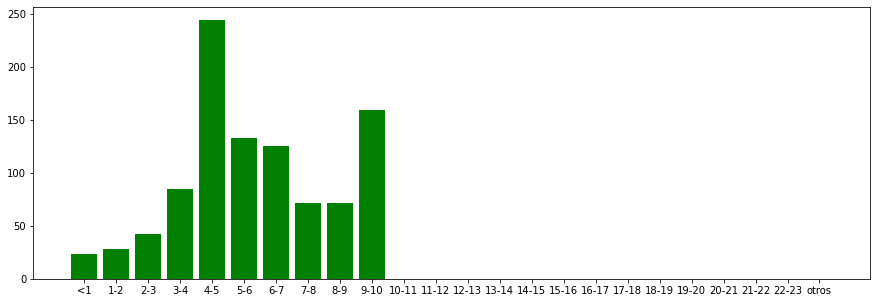

In [31]:
plt.figure(figsize=(15,5))
plt.bar(buckp.keys(), buckp.values(), color='g')


Notamos que los precios dominantes se encuentran de 4 a 5 millones de pesos. A su vez notamos que a partir del rango 10-11 millones de pesos no hay datos que podamos visualizar, por lo que cabe revisar sus valores, ya que teníamos que el valor máximo es superior a los 22 millones

In [32]:
print(buckp['10-11'])
print(buckp['11-12'])
print(buckp['12-13'])
print(buckp['13-14'])
print(buckp['14-15'])
print(buckp['15-16'])
print(buckp['16-17'])
print(buckp['17-18'])
print(buckp['18-19'])
print(buckp['19-20'])
print(buckp['20-21'])
print(buckp['21-22'])
print(buckp['22-23'])
print(buckp['otros'])

0
0
0
0
0
0
0
0
0
0
0
0
0
0


Como todos están en 0, podemos asumir que hay algún error, para ubicarlo, primero sumaremos la cantidad que hay en nuestros buckets hasta los 10 millones, que es donde tenemos valores.

In [33]:
buckp['<1']+buckp['1-2']+buckp['2-3']+buckp['3-4']+buckp['4-5']+buckp['5-6']+buckp['6-7']+buckp['7-8']+buckp['8-9']+buckp['9-10']

981

Al hacer el conteo obtenemos los 981 registros de la base de datos, por lo que el error se encuentra en el máximo de la lista precios. Por ello únicamente nos enfocaremos en los precios hasta el bucket 9 a 10 millones de pesos.

In [34]:
del buckp['10-11']
del buckp['11-12']
del buckp['12-13']
del buckp['13-14']
del buckp['14-15']
del buckp['15-16']
del buckp['16-17']
del buckp['17-18']
del buckp['18-19']
del buckp['19-20']
del buckp['20-21']
del buckp['21-22']
del buckp['22-23']
del buckp['otros']

In [35]:
# Verificamos que nos quedemos con las datos que queremos
buckp

{'<1': 23,
 '1-2': 28,
 '2-3': 42,
 '3-4': 85,
 '4-5': 244,
 '5-6': 133,
 '6-7': 125,
 '7-8': 71,
 '8-9': 71,
 '9-10': 159}

En nuestra lista de precios tenemos que el máximo es de 22 millones de pesos, mas no lo encontramos en algún bucket corresponidente, además la suma de los primeros buckets da los 981 inmuebles de la base de datos, por lo que no encuentro el valor anómalo.

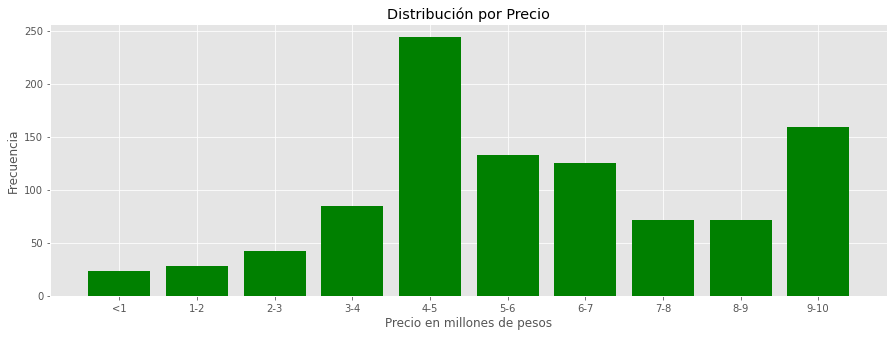

In [36]:
# Graficamos para la presentación.

plt.figure(figsize=(15,5))
plt.style.use('ggplot')
plt.title('Distribución por Precio')
plt.xlabel('Precio en millones de pesos')
plt.ylabel('Frecuencia')
plt.bar(buckp.keys(), buckp.values(), color='g')
plt.savefig('Distribución_Precio.png')




### Superficie
Ahora veamos los datos de la superficie del inmueble, es decir, los metros cuadrados con los que cuenta. 

In [37]:
df['attributes']

0      127 m² construidos,2 recs.
1        54 m² construidos,1 rec.
2      163 m² construidos,3 recs.
3       93 m² construidos,2 recs.
4      103 m² construidos,2 recs.
                  ...            
976    140 m² construidos,2 recs.
977     84 m² construidos,2 recs.
978     88 m² construidos,2 recs.
979    114 m² construidos,2 recs.
980    114 m² construidos,3 recs.
Name: attributes, Length: 981, dtype: object

In [38]:
superficie = []

for i in df['attributes']:
    # Separamos las entradas por espacios en blanco
    s = i.split(' ')[0]
    superficie.append(float(s))
    superficie.append('')
    
print(superficie)

ValueError: could not convert string to float: '7,210'

Notamos que hay un valor que no se pudo convertir, a parte de que es un valor "raro", pues no hay viviendas de 7000 m² ni de 7m² (dependiendo del significado de la coma), por lo que analicemos lo mismo, pero busquemos cuántos valores son anómalos.

In [39]:
superficie = []
indices = []

# La c es un contador que medirá el numero de datos irregulares
# la j nos indicará el índice donde hay anomalías
c=0
j=0

for i in df['attributes']:
    j += 1
    s = i.split(' ')[0]
    try:
        superficie.append(float(s))
    except: 
        c += 1
        superficie.append('?')
        indices.append(j)
    
print("numero de valores anómalos: "+ str(c))
print("la posicion de los valores anómalos son " + str(indices))



numero de valores anómalos: 1
la posicion de los valores anómalos son [542]


Observamos que únicamente hay un valor extraño, por lo que debemos encontrarlo y modificarlo para que sea congruente, para ello consideraremos que los 7,210 se refiere a 72.0 m² pues también podemos observar que manejamos numeros de punto flontante con 0 en sus decimales.

In [40]:
# Adjuntamos el valor de la superfice en la posición correspondiente
superficie[541]=72.0

# Adjunto en la posición 541 pues al modificar la posición 542 cambiaba un valor correcto y dejaba el no deseado.

In [41]:
# Verificamos que se haya anexado el valor correcto en la posición correcta
print(superficie[541])

# Verificamos que la longitud de la lista sea la deseada
print(len(superficie))

72.0
981


Ahora podemos anexar los valores numéricos obtenidos a nuestro df.

In [42]:
df.insert(7, 'superficie', superficie)
# Verificamos que se haya insertado correctamente nuestra nueva columna
df.head()

,main_name,subtitle,link,location,price,precio,attributes,superficie,timestamp,id,...,age_in_years,bathrooms,cellars,num_floors,monthly_fee,parking_lots,num_bedrooms,m2,final_price,price_square_meter
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...",9000000 pesos,9000000,"127 m² construidos,2 recs.",127.0,2022-03-29,1,...,0.0,2.0,NaN,1.0,0 MXN,2,2.0,127.0,9000000.0,70866.141732
1,Preventa Exclusiva · Terraloza Roma Norte ·,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tonala, Roma Norte, Cuauhtémoc, Distrito Federal",4264000 pesos,4264000,"54 m² construidos,1 rec.",54.0,2022-03-29,2,...,0.0,1.0,NaN,NaN,NaN,1,1.0,54.0,4264000.0,78962.962963
2,Townhouse Único En La Roma Sur,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Tepeji 43, Roma Sur, Ciudad De México, Cdmx, M...",8093500 pesos,8093500,"163 m² construidos,3 recs.",163.0,2022-03-29,3,...,0.0,3.0,2.0,3.0,NaN,2,3.0,163.0,8093500.0,49653.374233
3,"Departamento En Roma Sur, Cuauhtémoc Con 2 Rec...",Departamento en venta,https://departamento.metroscubicos.com/MLM-132...,"Linares, Roma Sur, Cuauhtémoc, Distrito Federal",4000000 pesos,4000000,"93 m² construidos,2 recs.",93.0,2022-03-29,4,...,0.0,2.0,NaN,NaN,853 MXN,1,2.0,93.0,4000000.0,43010.752688
4,Últimos Deptos En Preventa En Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-137...,"Frontera, Roma Norte, Cuauhtémoc, Distrito Fed...",6732700 pesos,6732700,"103 m² construidos,2 recs.",103.0,2022-03-29,5,...,0.0,2.0,NaN,NaN,NaN,1,2.0,103.0,6732700.0,65366.019417


In [43]:
# Revisamos estadísticas básicas de la superficie
df['superficie'].describe()

count    981.000000
mean     104.541284
std       46.658875
min       31.000000
25%       75.000000
50%       93.000000
75%      129.000000
max      327.000000
Name: superficie, dtype: float64

array([[<AxesSubplot:title={'center':'superficie'}>]], dtype=object)

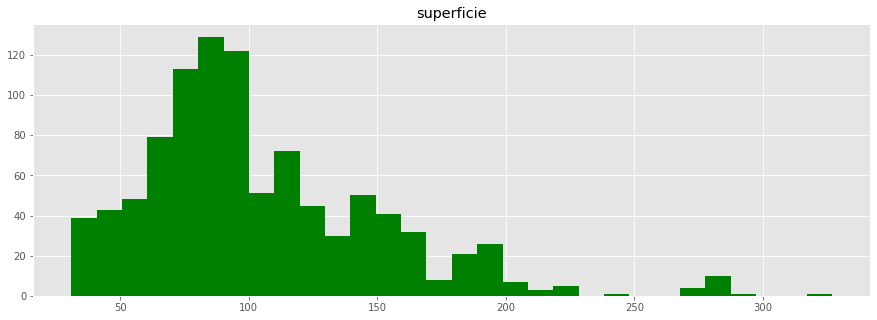

In [44]:
# Mostramos otra técnica para generar histogramas
df.hist(column='superficie',figsize=(15,5), color='g', bins=30)

Ahora que conocemos el precio y la superfice en m² podemos calcular el precio por m² de cada vivienda

### Precio por m²

In [45]:
pxm = df['precio']/df['superficie']

In [46]:
pxm

0      70866.141732
1      78962.962963
2      49653.374233
3      43010.752688
4      65366.019417
           ...     
976    45607.142857
977    49000.000000
978    48136.363636
979    58071.228070
980    55000.000000
Length: 981, dtype: float64

In [47]:
pxm.describe()

count       981.000000
mean      61114.626393
std       19234.843632
min        2932.076453
25%       52380.952381
50%       61271.466667
75%       70175.438596
max      150514.818182
dtype: float64

In [48]:
# Agregamos el precio por metro cuadrado a nuestro df.
df.insert(32, 'pxm', pxm)
df.head(1)

,main_name,subtitle,link,location,price,precio,attributes,superficie,timestamp,id,...,bathrooms,cellars,num_floors,monthly_fee,parking_lots,num_bedrooms,m2,final_price,price_square_meter,pxm
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...",9000000 pesos,9000000,"127 m² construidos,2 recs.",127.0,2022-03-29,1,...,2.0,NaN,1.0,0 MXN,2,2.0,127.0,9000000.0,70866.141732,70866.141732


array([[<AxesSubplot:title={'center':'pxm'}>]], dtype=object)

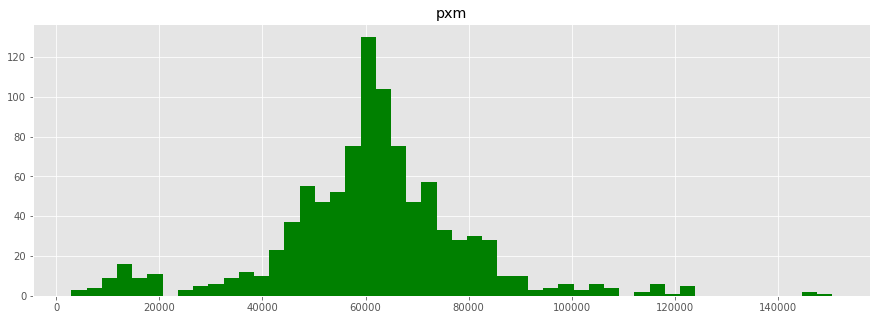

In [49]:
df.hist(column='pxm',figsize=(15,5), color='g', bins=50)

Aquí sí podemos apreciar claramente una distribución normal en los precios por metro cuadrado

### Baños
Tenemos que asegurarnos que los datos en baños estén en valor numérico

In [50]:
df['bathrooms'].describe()

count    981.000000
mean       1.970438
std        0.887638
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max       23.000000
Name: bathrooms, dtype: float64

### Numero de pisos
Hacemos lo mismo para el número de pisos.

In [51]:
df['num_floors'].describe()
# Únicamente tenemos 84 viviendas con datos en el numero de pisos.

count    84.000000
mean      3.607143
std       2.789904
min       1.000000
25%       1.000000
50%       3.000000
75%       5.000000
max      12.000000
Name: num_floors, dtype: float64

In [52]:
df['num_floors']

0      1.0
1      NaN
2      3.0
3      NaN
4      NaN
      ... 
976    NaN
977    NaN
978    NaN
979    NaN
980    1.0
Name: num_floors, Length: 981, dtype: float64

Tenemos muchos datos incompletos, verifiquemos cuántos son.

Únicamente hay información del número de baños en 84 departamentos, lo que representa un 8.35% de los registros, no nos dará información útil.

### Numero de estacionamientos
Revisamos lo mismo para el número de estacionamientos

In [53]:
df['parking_lots'].describe()

count    981.000000
mean       1.331295
std        0.481631
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: parking_lots, dtype: float64

array([[<AxesSubplot:title={'center':'parking_lots'}>]], dtype=object)

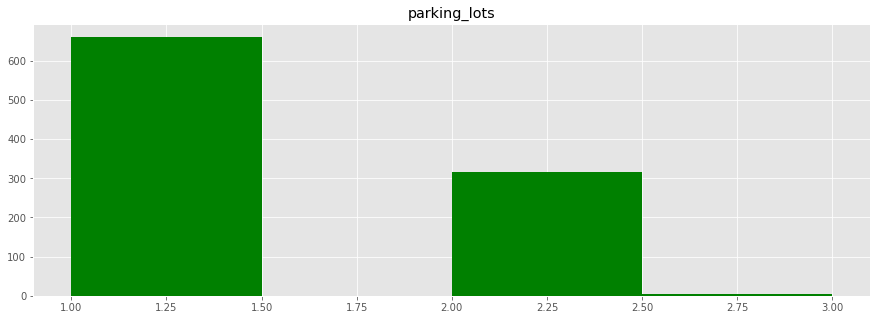

In [54]:
df.hist(column='parking_lots',figsize=(15,5), color='g', bins=4)

### Habitaciones

In [57]:
df['num_bedrooms'].describe()

count    981.000000
mean       2.103976
std        0.627104
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: num_bedrooms, dtype: float64

array([[<AxesSubplot:title={'center':'num_bedrooms'}>]], dtype=object)

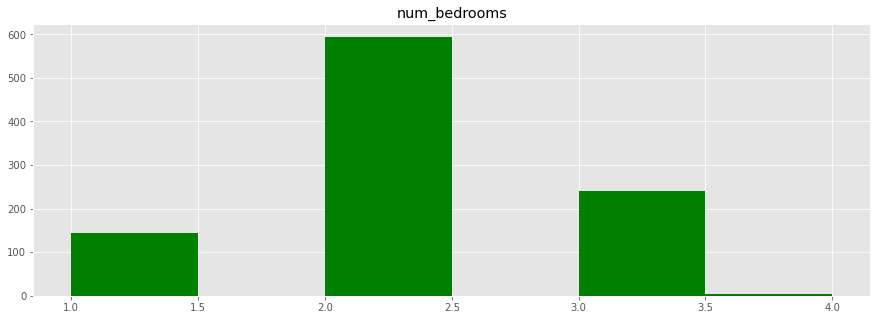

In [58]:
df.hist(column='num_bedrooms',figsize=(15,5), color='g', bins=6)

Ahora que tenemos todos los datos importantes y disponibles y analizados, podemos hacer un mapa de calor que nos muestre las relaciones cruzadas entre las diferentes variables.

### Coeficientes de Corelación

Primero revisamos una última vez nuestro df original para elegir los valores que usaremos.

In [59]:
df.head(1)

,main_name,subtitle,link,location,price,precio,attributes,superficie,timestamp,id,...,bathrooms,cellars,num_floors,monthly_fee,parking_lots,num_bedrooms,m2,final_price,price_square_meter,pxm
0,Departamento - Roma Norte,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Sinaloa 20 , Roma Sur, Roma Sur, Cuauhtémoc, D...",9000000 pesos,9000000,"127 m² construidos,2 recs.",127.0,2022-03-29,1,...,2.0,NaN,1.0,0 MXN,2,2.0,127.0,9000000.0,70866.141732,70866.141732


Ahora creamos un nuevo df con únicamente los valores requeridos que tenemos disponibles basados en la investigación que se hizo inicialmente.

In [60]:
df2=df[['precio', 'superficie', 'bathrooms', 'parking_lots', 'num_bedrooms', 'pxm']].copy()

In [61]:
df2.head(3)

,precio,superficie,bathrooms,parking_lots,num_bedrooms,pxm
0,9000000,127.0,2.0,2,2.0,70866.141732
1,4264000,54.0,1.0,1,1.0,78962.962963
2,8093500,163.0,3.0,2,3.0,49653.374233


Como lo que nos interesa es el precio por metro cuadrado, es decir, nuestra variable *pxm*, buscaremos nuestro factor de coorelación con cada uno de nuestros parámetros.

**Percio - Precio por metro cuadrado**

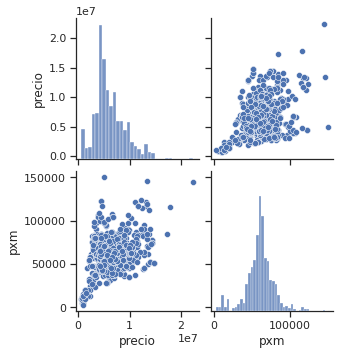

<Figure size 432x288 with 0 Axes>

In [62]:
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(df2[['precio', 'pxm']])
plt.show()
plt.savefig('Correlación Precio-PxM.png')

In [63]:
x = df2['precio'].to_numpy()
y = df2['pxm'].to_numpy()


x = x.reshape(981,1)
y = y.reshape(981,1)

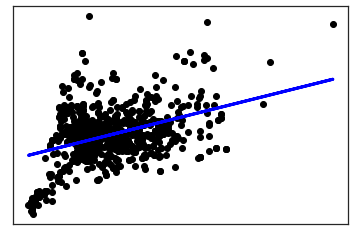

<Figure size 432x288 with 0 Axes>

In [64]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x),color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
plt.savefig('LR-precio-pxm.png')

In [65]:
dfprecio = df[['precio', 'pxm']]
dfprecio.corr()

,precio,pxm
precio,1.000000,0.395529
pxm,0.395529,1.000000


**Superficie- Precio por metro cuadrado**

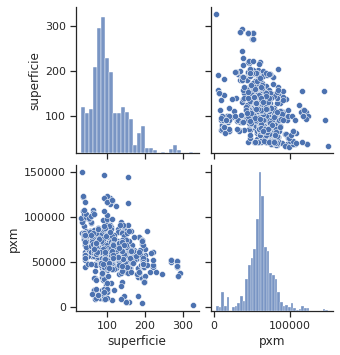

<Figure size 432x288 with 0 Axes>

In [67]:
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(df2[['superficie', 'pxm']])
plt.show()
plt.savefig('Correlación Superficie-PxM.png')

In [68]:
x = df2['superficie'].to_numpy()
y = df2['pxm'].to_numpy()


x = x.reshape(981,1)
y = y.reshape(981,1)

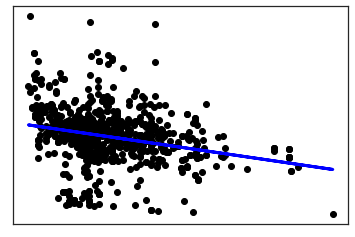

<Figure size 432x288 with 0 Axes>

In [69]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x),color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()
plt.savefig('Correlación Superficie-PxM.png')

In [70]:
dfsuperficie= df[['superficie', 'pxm']]
dfsuperficie.corr()

,superficie,pxm
superficie,1.000000,-0.272577
pxm,-0.272577,1.000000


**Baños - Precio por metro cuadrado**

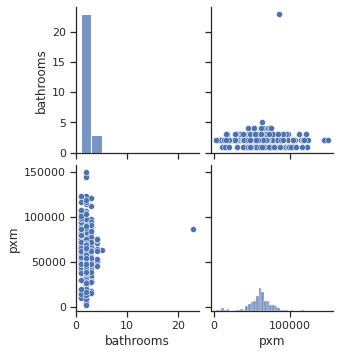

<Figure size 432x288 with 0 Axes>

In [71]:
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(df2[['bathrooms', 'pxm']])
plt.show()
plt.savefig('Correlación Bath-PxM.png')

In [72]:
x = df2['bathrooms'].to_numpy()
y = df2['pxm'].to_numpy()


x = x.reshape(981,1)
y = y.reshape(981,1)

**No. de estacionamientos - precio por metro cuadrado**

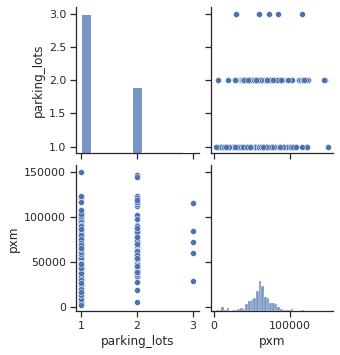

<Figure size 432x288 with 0 Axes>

In [73]:
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(df2[['parking_lots', 'pxm']])
plt.show()
plt.savefig('Correlación Parking-PxM.png')

**No. de habitaciones - Precio por metro cuadrado**

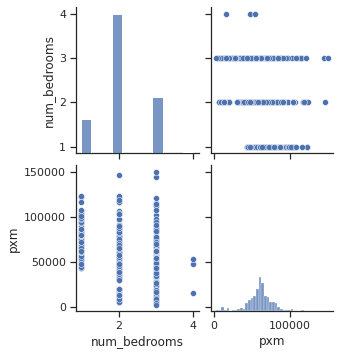

<Figure size 432x288 with 0 Axes>

In [74]:
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(df2[['num_bedrooms', 'pxm']])
plt.show()
plt.savefig('Correlación Bed-PxM.png')